# Importing all the required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore") # To ignore the warnings

# Importing dataset in csv format

In [3]:
heart = pd.read_csv("heart.csv")

In [4]:
heart.head() #to observe first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.shape  #to check the shape of data

(303, 14)

In [6]:
heart.isnull().sum() #to check any null values exists

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Identifying and removing outliers

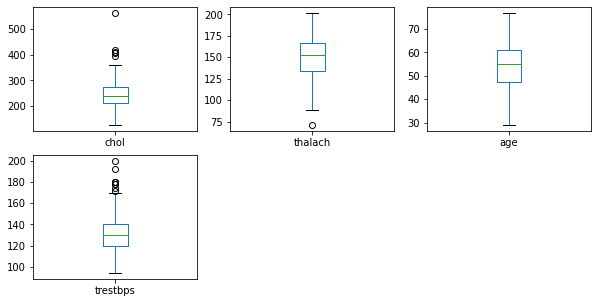

In [9]:
plt.figure(1,figsize=(10,5))

plt.subplot(2,3,1)
heart["chol"].plot(kind="box")

plt.subplot(2,3,2)
heart["thalach"].plot(kind="box")

plt.subplot(2,3,3)
heart["age"].plot(kind="box")

plt.subplot(2,3,4)
heart["trestbps"].plot(kind="box")
plt.show()

In [10]:
def outliers(feature):
    e=[]
    a= np.mean(heart[feature])
    b= np.std(heart[feature])
    for u in heart[feature]:
        d=(u-a)/b
        if abs(d)>3:
            e.append(u)
    return e
thalach=outliers("thalach")
chol=outliers("chol")
trestbps=outliers("trestbps")
print("Outliers in thalach feature are:{}".format(thalach))
print("Outliers in chol feature are:{}".format(chol))
print("Outliers in chol feature are:{}".format(trestbps))

Outliers in thalach feature are:[71]
Outliers in chol feature are:[417, 564, 407, 409]
Outliers in chol feature are:[200, 192]


In [11]:
heart= heart[(heart["thalach"]>72)]

In [12]:
heart= heart[(heart["chol"]>115) & (heart["chol"]<370)]

In [13]:
heart= heart[(heart["trestbps"]>90) & (heart["trestbps"]<170)]

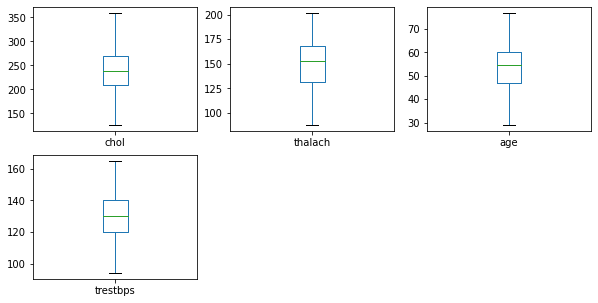

In [14]:
plt.figure(1,figsize=(10,5))

plt.subplot(2,3,1)
heart["chol"].plot(kind="box")

plt.subplot(2,3,2)
heart["thalach"].plot(kind="box")

plt.subplot(2,3,3)
heart["age"].plot(kind="box")

plt.subplot(2,3,4)
heart["trestbps"].plot(kind="box")
plt.show()

In [15]:
corr=heart.corr()  #corelation matrix

<AxesSubplot:>

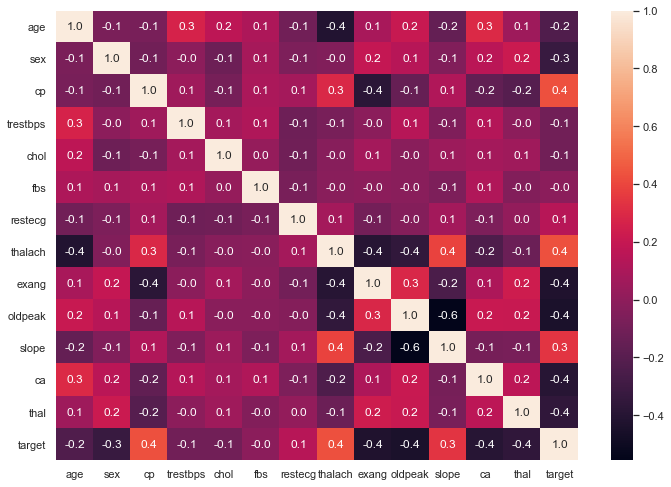

In [16]:
sns.set(rc={"figure.figsize":(11.7,8.27)})
sns.heatmap(corr, annot=True, fmt="0.01f") #checking the colinearity

In [17]:
heart.drop("fbs",axis=1,inplace=True) #removing "fbs" feature

In [18]:
x = heart.iloc[:,0:-1] #Independent variable
y = heart.iloc[:,[-1]] #Dependent variable

In [19]:
st = StandardScaler()

In [20]:
x = st.fit_transform(x) #Scaling independent variables

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,stratify=y,random_state=1)

# LogisticRegression model

In [22]:
model = LogisticRegression()

In [23]:
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred_model = model.predict(x_test)

In [25]:
accuracy_score(y_test,y_pred_model)

0.896551724137931

In [26]:
confusion_matrix(y_test,y_pred_model)

array([[10,  3],
       [ 0, 16]], dtype=int64)

# KNN model

In [27]:
knn= KNeighborsClassifier(n_neighbors=9)

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [29]:
y_pred_knn=knn.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred_knn)

0.9310344827586207

Method to determine the best n_neighbors

In [31]:
e=[]
for u in range(1,30,2):
    knn= KNeighborsClassifier(n_neighbors=u)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test).reshape(29,1)
    e.append(np.mean(y_pred_knn!=y_test))

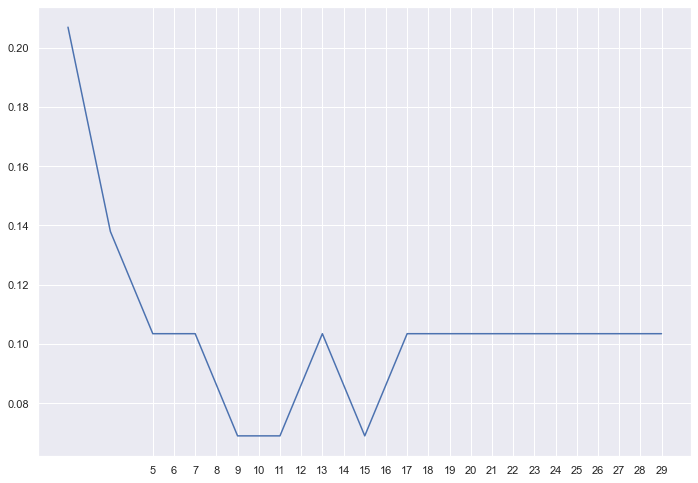

In [32]:
plt.plot(range(1,30,2),e)
plt.xticks(range(5,30))
plt.show()

In [33]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  3],
       [ 0, 16]], dtype=int64)

# DecisionTree model

In [34]:
dct= DecisionTreeClassifier(criterion="entropy")

In [35]:
train=dct.fit(x_train,y_train)

In [36]:
y_pred_dct= dct.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred_dct)

0.6896551724137931

In [38]:
confusion_matrix(y_test,y_pred_dct)

array([[ 8,  5],
       [ 4, 12]], dtype=int64)

# RandomForest 

In [49]:
rfc= RandomForestClassifier(n_estimators=27)

In [50]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=27)

In [51]:
y_pred_rfc= rfc.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred_rfc)

0.7931034482758621

In [53]:
confusion_matrix(y_test,y_pred_rfc)

array([[ 8,  5],
       [ 1, 15]], dtype=int64)

# Plotting roc curve

In [54]:
model_fpr,model_tpr,_= roc_curve(y_test,y_pred_model)

In [55]:
knn_fpr,knn_tpr,_= roc_curve(y_test,y_pred_knn)

In [56]:
dtc_fpr,dtc_tpr,_= roc_curve(y_test,y_pred_dct)

In [57]:
rfc_fpr,rfc_tpr,_= roc_curve(y_test,y_pred_rfc)

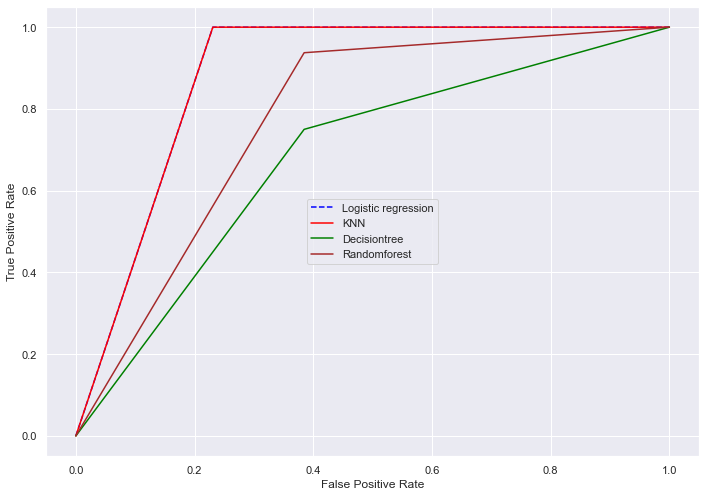

In [59]:
plt.plot(model_fpr,model_tpr,linestyle="--",color="blue")
plt.plot(knn_fpr,knn_tpr,linestyle="-",color="red")
plt.plot(dtc_fpr,dtc_tpr,linestyle="-",color="green")
plt.plot(rfc_fpr,rfc_tpr,linestyle="-",color="brown")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(labels = ("Logistic regression","KNN","Decisiontree","Randomforest"), loc = 'center')

plt.show()

In [71]:
con=pd.DataFrame({"Model":["Logistic regression","Knearest neighbour","Decisiontree classifier","Randomforest classifier"],
             "Accuracy(In percentage)":[89,93,68,89]})

In [72]:
con["Confusion_matrix"]=[np.array([[10,3],[0,16]]),np.array([[10,3],[0,16]]),np.array([[8,5],[4,12]]),np.array([[11,2],[1,15]])]

In [73]:
con

,Model,Accuracy(In percentage),Confusion_matrix
0,Logistic regression,89,"[[10, 3], [0, 16]]"
1,Knearest neighbour,93,"[[10, 3], [0, 16]]"
2,Decisiontree classifier,68,"[[8, 5], [4, 12]]"
3,Randomforest classifier,89,"[[11, 2], [1, 15]]"


# Conclusion

By observing above results and considering above samples KNN algorihm gives the highest accuracy along with the best ROC curve for this dataset.